## Principal Component Analysis with PlyData

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

from mpl_toolkits.mplot3d import Axes3D
# from Plyfile import PlyData, PlyElement
from plyfile import PlyData

%matplotlib notebook
#%matplotlib qt5
#%matplotlib inline

Every 100 data samples, we save 1. If things run too slow, 
try increasing this number. If things run too fast, try decreasing it... =)

In [13]:
reduce_factor = 100

# Look pretty...
matplotlib.style.use('ggplot')
from sklearn.decomposition import PCA

### Load up the scanned Armadillo
The goal of this notebook is to reduce its dimensionality from three to two 
using PCA to cast a shadow of the data onto its two most important principal components. 
Then render the resulting 2D scatter plot.

In [15]:
plyfile = PlyData.read('stanford_armadillo.ply')

armadillo = pd.DataFrame({
  'x':plyfile['vertex']['z'][::reduce_factor],
  'y':plyfile['vertex']['x'][::reduce_factor],
  'z':plyfile['vertex']['y'][::reduce_factor]
})

  
  ### TODO: Write code to import the libraries required for PCA.
  Then, train your PCA on the armadillo dataframe. Finally,
  drop one dimension (reduce it down to 2D) and project the
  armadillo down to the 2D principal component feature space.
  
  ### NOTE: Be sure to RETURN your projected armadillo! 
  (This projection is actually stored in a NumPy NDArray and
  not a Pandas dataframe, which is something Pandas does for
  you automatically. =)


In [16]:
def do_PCA(armadillo):
    
  # .. your code here ..
    pca = PCA(n_components=2)
    pca.fit(armadillo)
  # svd_solver='auto',  iterated_power='auto', random_state=None,tol=0.0, 
    PCA(copy=True,  n_components=2, whiten=False)
  # print(pca.explained_variance_ratio_) # [0.99244...  0.00755...]
    T = pca.transform(armadillo)
    return T

  ### TODO: Write code to import the libraries required for RandomizedPCA. 
  Then, train your RandomizedPCA on the armadillo
  dataframe. Finally, drop one dimension (reduce it down to 2D)
  and project the armadillo down to the 2D principal component
  feature space.
  
  ### NOTE: Be sure to RETURN your projected armadillo! 
  (This projection is actually stored in a NumPy NDArray and
  not a Pandas dataframe, which is something Pandas does for
  you automatically. =)

In [17]:
def do_RandomizedPCA(armadillo):

  # .. your code here ..
    pca = PCA(n_components=2, svd_solver='randomized') 
    #RandomizedPCA(n_components=2)
    pca.fit(armadillo)
  # svd_solver='auto',  iterated_power='auto', random_state=None,tol=0.0, 
    PCA(copy=True,  n_components=2, whiten=False)
  # print(pca.explained_variance_ratio_) 
  # [0.99244...  0.00755...]

    T = pca.transform(armadillo)
    return T

### Render the Original Armadillo


<IPython.core.display.Javascript object>


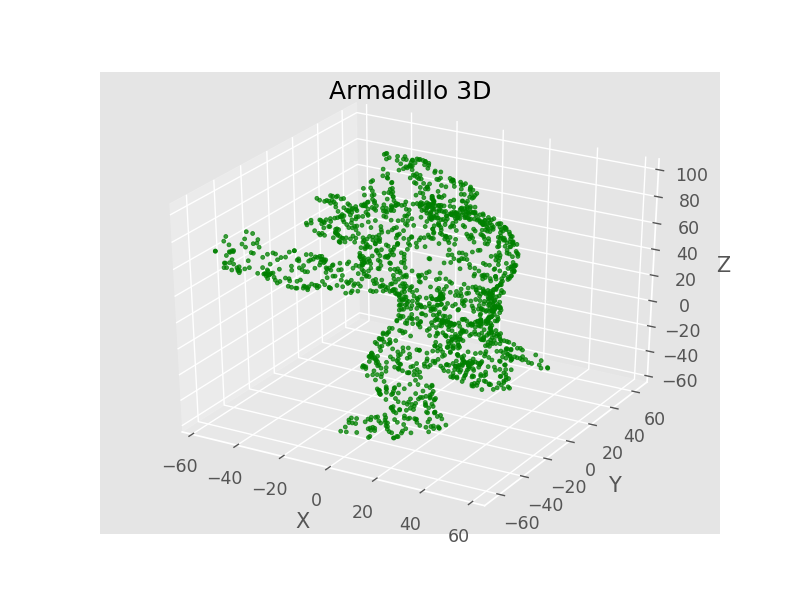

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title('Armadillo 3D')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.scatter(armadillo.x, armadillo.y, armadillo.z, c='green', marker='.', alpha=0.75)


### Time the execution of PCA 5000x

In [19]:
t1 = datetime.datetime.now()

for i in range(5000): 
    pca = do_PCA(armadillo)
    
time_delta = datetime.datetime.now() - t1 

print("time of 5000 x PCA: ", time_delta)


time of 5000 x PCA:  0:00:04.516800


### Render the newly transformed PCA Armadillo!


<IPython.core.display.Javascript object>


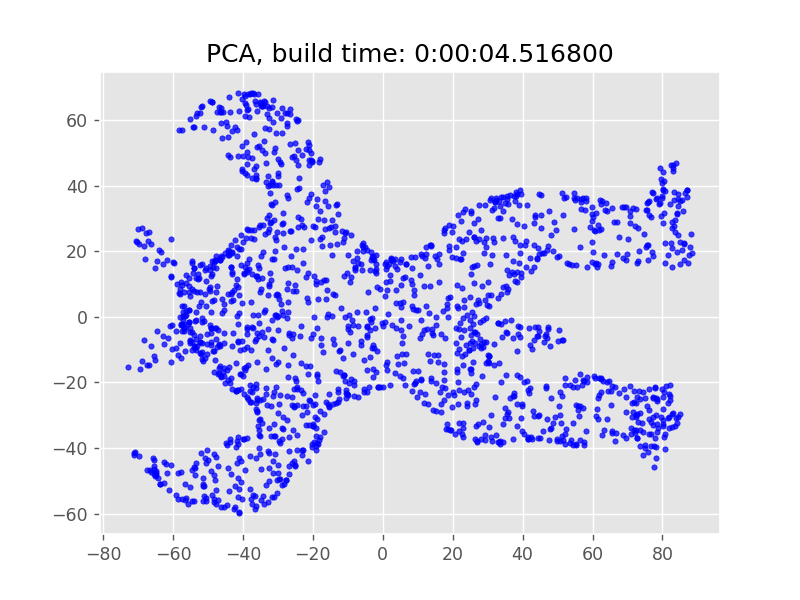

In [20]:
if not pca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('PCA, build time: ' + str(time_delta))
    ax.scatter(pca[:,0], pca[:,1], c='blue', marker='.', alpha=0.75)

### Time the execution of RandomizedPCA 5000x

In [21]:
t1 = datetime.datetime.now()

for i in range(5000):
    rpca = do_RandomizedPCA(armadillo)
    
time_delta = datetime.datetime.now() - t1

print("time of 5000 x RandomizedPCA: ", time_delta)

time of 5000 x RandomizedPCA:  0:00:04.658800


### Render the newly transformed RandomizedPCA Armadillo!

<IPython.core.display.Javascript object>


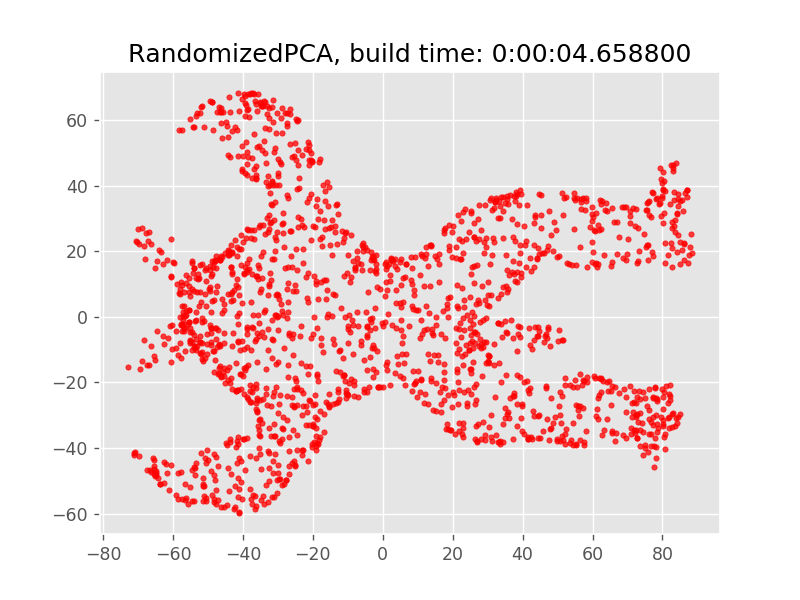

In [22]:
if not rpca is None:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title('RandomizedPCA, build time: ' + str(time_delta))
    ax.scatter(rpca[:,0], rpca[:,1], c='red', marker='.', alpha=0.75)


In [11]:
plt.show()